In [1]:
packages = c('Seurat','RColorBrewer','ggplot2','extrafont','ggpubr','tidyr')
for (p in packages){
    suppressPackageStartupMessages(eval(bquote(library(.(p)))))
}


In [2]:
seurat_ds <- readRDS('source_data/from_GEO/withCFT_ds_seurat_PCA_UMAP_clusters_v4.rds')
seurat <- readRDS('source_data/from_GEO/seurat_full_with_CFT.rds') 
seurat$depleted <- factor(grepl('d',seurat$orig.ident))
seurat$mRNA_counts <- seurat$nCount_RNA - seurat$RNA@counts['rRNA',]
seurat@active.ident <- seurat$depleted

non_depleted_seurat <- subset(seurat,idents='FALSE')
non_depleted_seurat@active.ident <- non_depleted_seurat$cell.type

depleted_seurat <- subset(seurat,idents='TRUE')
depleted_seurat@active.ident <- depleted_seurat$cell.type


In [3]:
## set "transcriptional deficiency" thresholds
non_depleted_threshold = mean(subset(non_depleted_seurat,idents='rif1hr_20230919')$mRNA_counts) + 2*sd(subset(non_depleted_seurat,idents='rif1hr_20230919')$mRNA_counts)
non_depleted_seurat$transcript_low <- factor(non_depleted_seurat$mRNA_counts < non_depleted_threshold)
non_depleted_threshold
depleted_threshold <- mean(subset(depleted_seurat,idents='rif1hr_20230919')$mRNA_counts) + 2*sd(subset(depleted_seurat,idents='rif1hr_20230919')$mRNA_counts)
depleted_seurat$transcript_low <- factor(depleted_seurat$mRNA_counts < depleted_threshold)
depleted_threshold
seurat <- merge(non_depleted_seurat,depleted_seurat)
seurat$cell.type <- factor(seurat$cell.type)

[1] 2.918446

[1] 2.235409


  TRUE  FALSE 
   664 154714 

Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Warning message:
“Removed 15493 rows containing non-finite outside the scale range (`stat_ydensity()`).”
Warning message:
“Removed 15493 rows containing non-finite outside the scale range (`stat_boxplot()`).”


[1] 111

[1] 327

Warning message:
“Removed 15493 rows containing non-finite outside the scale range (`stat_ydensity()`).”
Warning message:
“Removed 15493 rows containing non-finite outside the scale range (`stat_boxplot()`).”


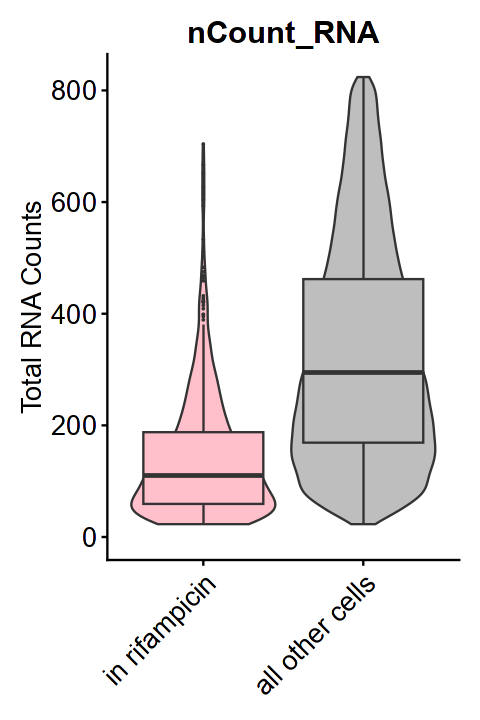

In [4]:
non_depleted_seurat$rif = factor(non_depleted_seurat$cell.type == 'rif1hr_20230919',levels=c('TRUE','FALSE'))
table(non_depleted_seurat$rif)
non_depleted_seurat@active.ident <- non_depleted_seurat$rif


options(repr.plot.width=4, repr.plot.height=6)
y_max <- quantile(subset(non_depleted_seurat,idents='FALSE')$nCount_RNA, probs = c(.9))

pal <- c(
    "FALSE" = 'gray',
    "TRUE" = 'pink'
  )

VlnPlot(non_depleted_seurat,features='nCount_RNA',pt.size=0) + ylim(0,y_max) + geom_boxplot(outlier.size=0) + 
    theme(
        axis.title.x = element_blank(),
        text=element_text(family= "Arial", size=16),
        axis.text.y = element_text(family= "Arial", size=16),
        axis.text.x = element_text(family= "Arial", size=16),
        axis.title.y = element_text(family= "Arial", size=16),
        legend.position = 'none') + 
    scale_fill_manual(
            values = pal,
            limits = names(pal)
          ) +
    ylab('Total RNA Counts') + scale_x_discrete(labels=c("FALSE" = "all other cells", "TRUE" = "in rifampicin"))

median(subset(non_depleted_seurat,idents='TRUE')$nCount_RNA)
median(subset(non_depleted_seurat,idents='FALSE')$nCount_RNA)
ggsave('figures/figED8d_rifampicin_RNA_counts.pdf',width = 4, height = 6)


Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Warning message:
“Removed 15426 rows containing non-finite outside the scale range (`stat_ydensity()`).”
Warning message:
“Removed 15426 rows containing non-finite outside the scale range (`stat_boxplot()`).”


[1] 0

[1] 34

Warning message:
“Removed 15426 rows containing non-finite outside the scale range (`stat_ydensity()`).”
Warning message:
“Removed 15426 rows containing non-finite outside the scale range (`stat_boxplot()`).”


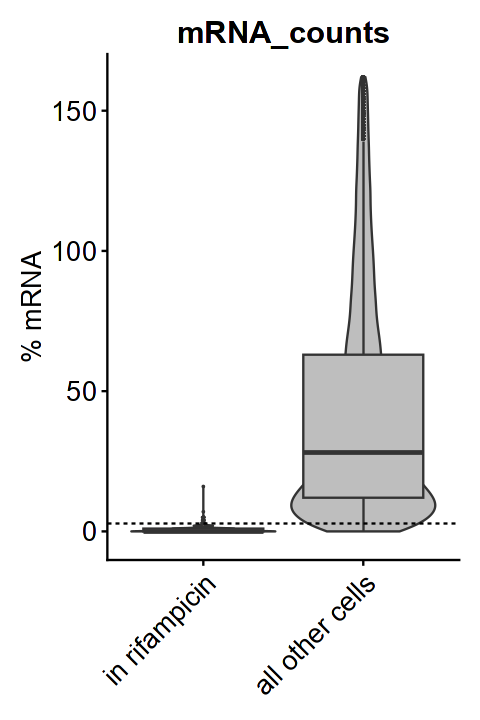

In [5]:
options(repr.plot.width=4, repr.plot.height=6)
y_max <- quantile(subset(non_depleted_seurat,idents='FALSE')$mRNA_counts, probs = c(.9))

pal <- c(
    "FALSE" = 'gray',
    "TRUE" = 'pink'
  )

VlnPlot(non_depleted_seurat,features='mRNA_counts',pt.size=0) + ylim(-2,y_max) + geom_boxplot(outlier.size=0) + 
    theme(
        axis.title.x = element_blank(),
        text=element_text(family= "Arial", size=16),
        axis.text.y = element_text(family= "Arial", size=16),
        axis.text.x = element_text(family= "Arial", size=16),
        axis.title.y = element_text(family= "Arial", size=16),
        legend.position = 'none') + 
    scale_fill_manual(
            values = pal,
            limits = names(pal)
          ) + 
    ylab('% mRNA') + scale_x_discrete(labels=c("FALSE" = "all other cells", "TRUE" = "in rifampicin")) + 
    geom_hline(yintercept=non_depleted_threshold, linetype="dashed", color = "black")

median(subset(non_depleted_seurat,idents='TRUE')$mRNA_counts)
median(subset(non_depleted_seurat,idents='FALSE')$mRNA_counts)

ggsave('figures/figED8e_rifampicin_mRNA_counts.pdf',width = 4, height = 6)


 [1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

Warning message in prop_table$freq[prop_table$freq == 0] + c(1e-04, 0.000101, 0.000102, :
“longer object length is not a multiple of shorter object length”
Warning message in prop_table$freq[prop_table$freq == 0] = prop_table$freq[prop_table$freq == :
“number of items to replace is not a multiple of replacement length”
Warning message:
“The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”


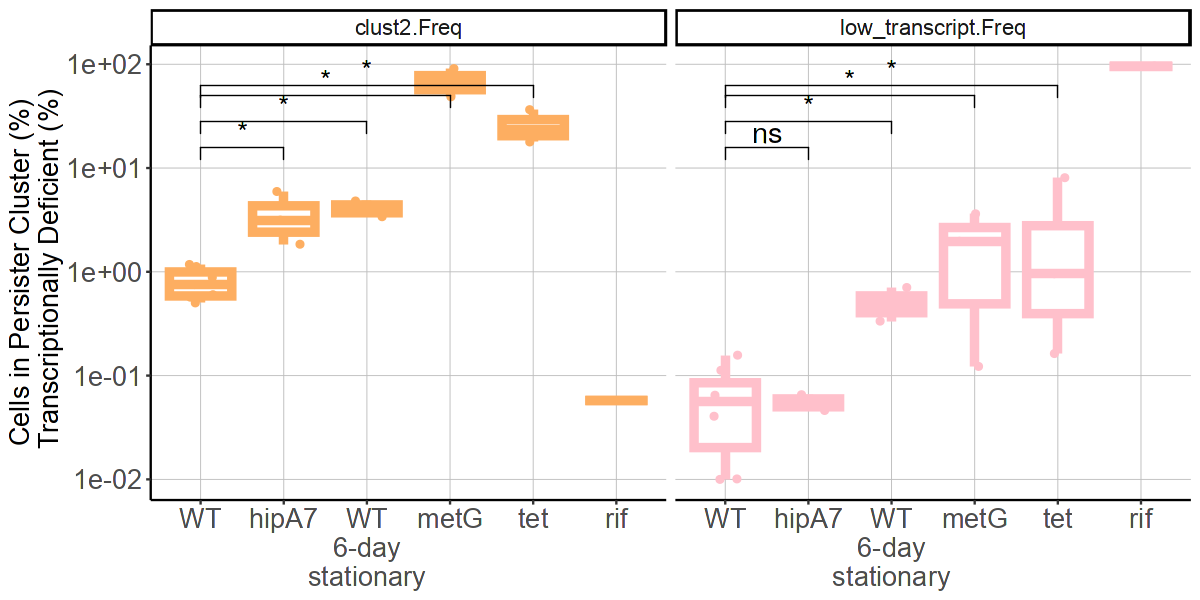

In [6]:
ids = c('t4_1hr_WT_20210722','WT_1hr_20220331','WT_42min_20211217','d1_1hr_1_20220807','WT_1hr_20220527','tet2_20211014','wt_1hr_20231016')
wt_len = length(ids)
all_ids = ids
ids = levels(seurat$cell.type)[(grepl('h1|h2|h3',levels(seurat$cell.type)))&(grepl('42min|50min',levels(seurat$cell.type)))]
hip_len = length(ids)
all_ids = c(all_ids,ids)
ids = c('d6_1hr_1_20220422','d6_1hr_2_20220422') 
d6_len = length(ids)
all_ids = c(all_ids,ids)
ids = c('d6_amp_3_20220422')
d6amp_len = length(ids)
all_ids = c(all_ids,ids)
ids = c('tet1_20211014','tet5_20211014','tet1hr_20230919')
tet_len = length(ids)
all_ids = c(all_ids,ids)
ids = c('metG1_20200926','metG5_20201018_1','metG_52min_20211217')
metG_len = length(ids)
all_ids = c(all_ids,ids)
ids = c('metG_imm_abx_20230919')
metGabx_len = length(ids)
all_ids = c(all_ids,ids)
ids = c('metG_amp_20231016')
metG_amp_len = length(ids)
all_ids = c(all_ids,ids)
ids = c('rif1hr_20230919')
rif_len = length(ids)
all_ids = c(all_ids,ids)
ids = c('wt_amp_20231016')
wt_amp_len = length(ids)
all_ids = c(all_ids,ids)
ids = c('CFT073_amp_20231016')
CFT_amp_len = length(ids)
all_ids = c(all_ids,ids)
ids = c('t1_undil_WT_20210722')
t1_wt_len = length(ids)
all_ids = c(all_ids,ids)


cell_counts <- data.frame(ids=all_ids,type=c(rep('WT',wt_len),rep('hip',hip_len),rep('d6',d6_len),rep('d6amp',d6amp_len),rep('tet',tet_len),rep('metG',metG_len),rep('metG_imm_amp',metGabx_len),rep('metG_4hr_amp',metG_amp_len),rep('rif',rif_len),rep('wt_amp',wt_amp_len),rep('CFT_amp',CFT_amp_len),rep('t1_wt',t1_wt_len)))
cell_counts$total <- table(seurat$cell.type)[all_ids]
cell_counts$low_transcript <- table(subset(seurat,transcript_low == TRUE)$cell.type)[all_ids]
filtered_cells = subset(seurat,cells=names(seurat_ds$cell.type),invert=TRUE)
cell_counts$filtered <- table(subset(filtered_cells,transcript_low==FALSE)$cell.type)[all_ids]
seurat_ds_sufficient_transcript <- subset(seurat_ds,cells=names(subset(seurat,transcript_low==FALSE)$cell.type))
cell_counts$clust2 <- table(subset(seurat_ds_sufficient_transcript,seurat_clusters=='2')$cell.type)[all_ids]
cell_counts$other_clusters <- table(subset(seurat_ds_sufficient_transcript,seurat_clusters!='2')$cell.type)[all_ids]
cell_counts$total - rowSums(cell_counts[,4:7]) ## check all are zero (all cells accounted for once)

seurat$seurat_clusters <- seurat_ds$seurat_clusters
ids = cell_counts$ids

median_mRNA <- c()
for (id in ids){
    seurat@active.ident <- seurat$cell.type
    sub_seurat <- subset(seurat,idents=id)
    median_mRNA <- c(median_mRNA,median(sub_seurat$mRNA_counts))
    }
cell_counts$median_mRNA <- median_mRNA

options(repr.plot.width=10, repr.plot.height=5)
prop_table <- cell_counts[,4:7]/cell_counts$total
prop_table <- prop_table[,grepl('Freq',colnames(prop_table))]
prop_table$ids <- cell_counts$ids
prop_table$type <- factor(cell_counts$type,levels=c('WT','hip','d6','metG','tet','rif','wt_amp','CFT_amp','d6amp','metG_imm_amp','metG_4hr_amp','t1_wt'))
prop_table <- prop_table %>% gather("freq_type", "freq", 1:4)
prop_table$freq[prop_table$freq==0] = prop_table$freq[prop_table$freq==0] + c(0.0001,0.000101,0.000102,0.000103)

l <- levels(prop_table$type)
my_comparisons <- list( l[1:2],l[c(1,3)],l[c(1,4)],l[c(1,5)] )

my_cols = brewer.pal(10,"Spectral")
pal <- c(
    "clust2.Freq" = my_cols[4],
    "low_transcript.Freq" = "pink"
  )

ggplot(subset(prop_table,(freq_type=='low_transcript.Freq' | freq_type=='clust2.Freq') & !grepl('amp',type)& !grepl('t1',type)), aes(x=type, y=100*freq, colour=freq_type))+
    facet_wrap(~freq_type) +
    geom_boxplot(lwd=2,fatten=1) + scale_y_log10() + theme_classic() + 
    scale_color_manual(
        values = pal,
        limits = names(pal)
      ) + 
    geom_point(position = position_jitterdodge()) +
    theme(
        axis.title.x = element_blank(),
        text=element_text(family= "Arial", size=16),
        axis.text.y = element_text(family= "Arial", size=16),
        axis.text.x = element_text(family= "Arial", size=16),
        axis.title.y = element_text(family= "Arial", size=16),
        legend.position = 'none',panel.grid.major = element_line(colour = "grey",size=0.2)) + 
    stat_compare_means(comparisons = my_comparisons, label='p.signif',
                       symnum.args=list(
                       cutpoints = c(0, 0.0005, 0.005, 0.05, 1), 
                       symbols = c("***", "**", "*", "ns"),
                       family='mono'),
                       label.x = 1.5, label.y = c(1,1.25,1.5,1.6), size=6,method.args = list(alternative = "less"),method = "wilcox") +
    ylab('Cells in Persister Cluster (%)\n Transcriptionally Deficient (%)') + 
    scale_x_discrete(labels=c("WT" = "WT", "hip" = "hipA7", "d6" = "WT\n6-day\nstationary",
                              "tet" = "tet","metG" = "metG", "rif" = "rif"))
ggsave('figures/figED8f_proportions_by_type.pdf',width = 10, height = 5)


Warning message in wilcox.test.default(c(15, 20, 48), c(28, 20, 28), alternative = "less", :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(28, 20, 28), c(192, 151, 144, 122, 155, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(15, 20, 48), c(28, 20, 28), alternative = "less", :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(28, 20, 28), c(192, 151, 144, 122, 155, :
“cannot compute exact p-value with ties”


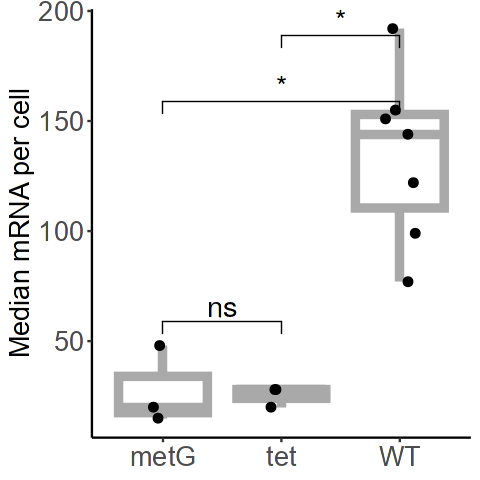

In [7]:
options(repr.plot.width=4, repr.plot.height=4)

l <- c('metG','tet','WT')
my_comparisons <- list( l[1:2],l[c(1,3)],l[c(2,3)] )

ggplot(subset(cell_counts,(type=='WT'|type=='metG'|type=='tet')), aes(x=type, y=median_mRNA))+
    geom_boxplot(lwd=2,fatten=1,colour='darkgrey') + theme_classic() + 
    geom_jitter(colour = 'black',size=2,width=0.15,height=0) +
    theme(
        axis.title.x = element_blank(),
        text=element_text(family= "Arial", size=16),
        axis.text.y = element_text(family= "Arial", size=16),
        axis.text.x = element_text(family= "Arial", size=16),
        axis.title.y = element_text(family= "Arial", size=16),
        legend.position = 'none') + 
    stat_compare_means(comparisons = my_comparisons, label='p.signif',
                       symnum.args=list(
                       cutpoints = c(0, 0.0005, 0.005, 0.05, 1), 
                       symbols = c("***", "**", "*", "ns"),
                       family='mono'),
                        label.x = 1.5, label.y = c(50,150,180), size=6,method.args = list(alternative = "less"),method = "wilcox") + 
    ylab('Median mRNA per cell') + 
    scale_x_discrete(labels=c("WT" = "WT","tet" = "tet","metG" = "metG")) #+ scale_y_continuous(trans='log10')
ggsave('figures/figED8g_metG_tet_mRNA.pdf',width = 4, height = 5)


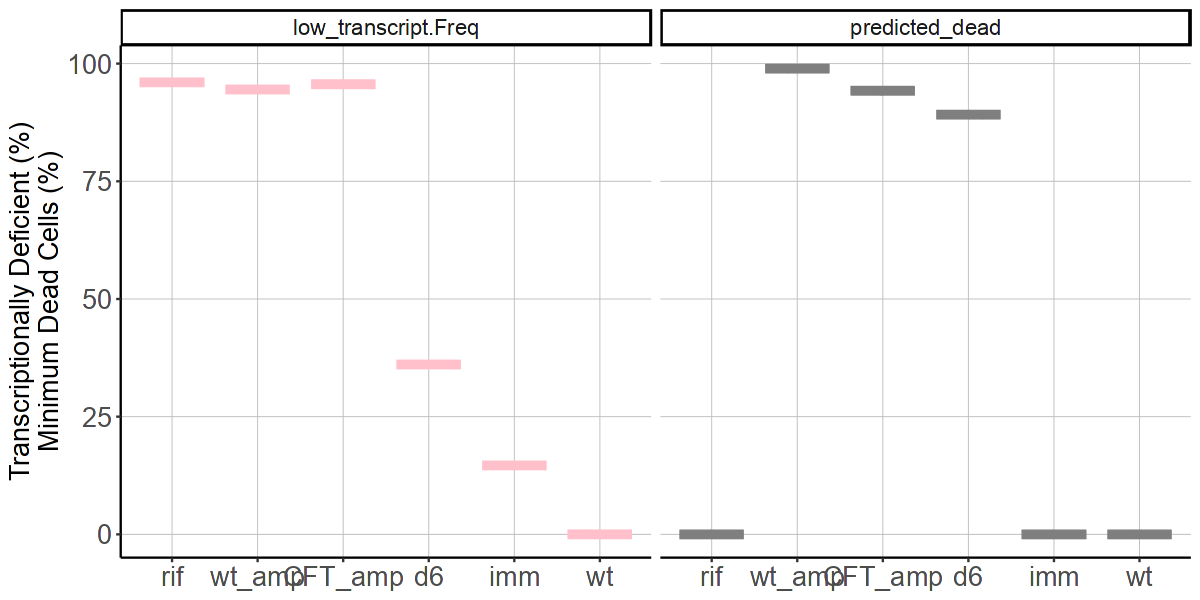

In [8]:
options(repr.plot.width=10, repr.plot.height=5)

ids = c('wt_amp','CFT_amp','d6amp','t1_wt','metG_imm_amp','rif')
sub_table = prop_table[prop_table$type %in% ids,]
sub_table$type <- droplevels(sub_table$type)
temp <- subset(sub_table,(freq_type=='low_transcript.Freq'))
temp$freq_type <- c('predicted_dead','predicted_dead','predicted_dead','predicted_dead','predicted_dead','predicted_dead')
temp$freq <- c(0.891489362,0,0,0.989189189,0.942028986,0) ## calculated in min_dead_cell_calculations.xlsx
sub_table <- rbind(sub_table,temp)
ggplot(subset(sub_table,(freq_type=='low_transcript.Freq') | (freq_type=='predicted_dead')), aes(x=type, y=100*freq, colour=freq_type))+
    facet_wrap(~freq_type) +
    geom_boxplot(lwd=2,fatten=1) + theme_classic() + 
    scale_color_manual(
        values = pal,
        limits = names(pal)
      ) + 
    geom_point(position = position_jitterdodge()) +
    theme(
        axis.title.x = element_blank(),
        text=element_text(family= "Arial", size=16),
        axis.text.y = element_text(family= "Arial", size=16),
        axis.text.x = element_text(family= "Arial", size=16),
        axis.title.y = element_text(family= "Arial", size=16),
        legend.position = 'none',panel.grid.major = element_line(colour = "grey",size=0.2)) + 
    ylab('Transcriptionally Deficient (%)\nMinimum Dead Cells (%)') + 
    scale_x_discrete(labels=c("d6amp" = "d6", "metG_imm_amp" = "imm", "metG_4hr_amp" = "4hr",
                              "wt_amp" = "wt_amp","CFT_amp" = "CFT_amp","t1_wt" = "wt"))
ggsave('figures/figED8h_min_dead.pdf',width = 10, height = 5)


Warning message:
“Removed 1 row containing missing values or values outside the scale range (`geom_point()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range (`geom_point()`).”


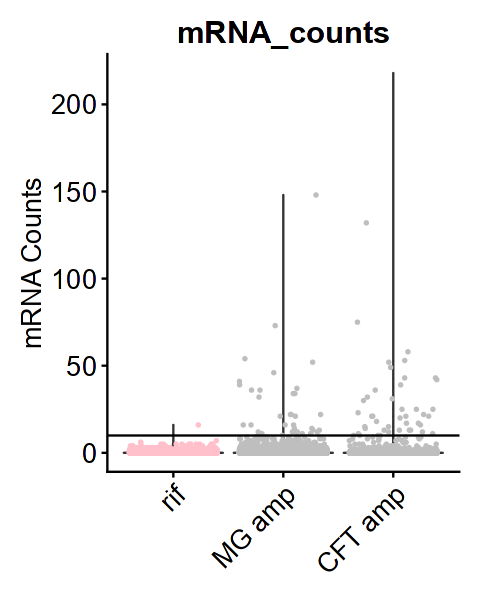

In [9]:
seurat@active.ident = seurat$cell.type
sub_seurat = subset(seurat,idents=c('rif1hr_20230919','CFT073_amp_20231016','wt_amp_20231016'))
sub_seurat@active.ident = droplevels(sub_seurat@active.ident)
sub_seurat@active.ident <- factor(sub_seurat@active.ident, levels = c("rif1hr_20230919", "wt_amp_20231016",'CFT073_amp_20231016'))


options(repr.plot.width=4, repr.plot.height=5)
pal <- c(
    "rif1hr_20230919" = 'pink',
    "CFT073_amp_20231016" = 'grey',
    "wt_amp_20231016" = 'grey'
  )

p <- VlnPlot(sub_seurat,features='mRNA_counts',pt.size=0)
p <- p + geom_jitter(mapping = aes(color = ident), data = p$data, size=0.5)
p + theme(
        axis.title.x = element_blank(),
        text=element_text(family= "Arial", size=16),
        axis.text.y = element_text(family= "Arial", size=16),
        axis.text.x = element_text(family= "Arial", size=16),
        axis.title.y = element_text(family= "Arial", size=16),
        legend.position = 'none') + 
    scale_fill_manual(
            values = pal,
            limits = names(pal)
          ) + 
    scale_colour_manual(
            values = pal,
            limits = names(pal)
          ) + 
    scale_x_discrete(labels=c("rif1hr_20230919" = "rif", "CFT073_amp_20231016" = "CFT amp","wt_amp_20231016" = "MG amp")) +
    geom_hline(yintercept = 10) + 
    ylab('mRNA Counts') 
ggsave('figures/figED8i_mRNA_counts_by_cel.pdf',width = 4, height = 7)
